In [46]:
import os
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [47]:
# load csv file
current_dir = os.getcwd()
file_path = os.path.join(current_dir, "..","data/preprocessed_data.csv")

df = pd.read_csv(file_path)

In [48]:
df.head()

,id,url,description,preprocessed_description
0,UCMdRkWIe9mdpsw4-8EID4rw,https://www.youtube.com/channel/UCMdRkWIe9mdps...,Movies. Music. Entertainment. Justified - Open...,music entertainment opening alternative ally l...
1,UCUsTSbCLD96-pcWi2Kqaitg,https://www.youtube.com/channel/UCUsTSbCLD96-p...,Lifestyle. Aussie Comedian. Gaming Video Creat...,comedian gaming video creator enjoy witty look...
2,UCyCyTe_1bT2aIPwG_gxbyeg,https://www.youtube.com/channel/UCyCyTe_1bT2aI...,Lifestyle. The Lanning family has been making ...,family making last unique family fun along way...
3,UCHuD3bhRhvOuAPqVJZlQfWw,https://www.youtube.com/channel/UCHuD3bhRhvOuA...,Entertainment. Movies. N.R.P Cinemas is a mark...,entertainment mark great huge library blockbus...
4,UCW2OUlFrrWiZvSsZRwOYmNg,https://www.youtube.com/channel/UCW2OUlFrrWiZv...,Vehicles. Lifestyle. YOUCAR is the world's fir...,world first automotive news channel new car ro...


In [49]:
#tfidf_vectorizer = TfidfVectorizer(use_idf=True, norm='l2', smooth_idf = True, ngram_range=(1, 2))
tfidf_vectorizer = TfidfVectorizer(use_idf=True, norm='l2', smooth_idf = True)

In [50]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df['preprocessed_description'])

In [ ]:
tfidf_matrix = tfidf_matrix.toarray()

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
print(feature_names)

In [ ]:
print(len(tfidf_matrix[0]))

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensionality
num_components = 5000  # Choose the number of components (dimensions)
pca = PCA(n_components=num_components)
tfidf_matrix_pca = pca.fit_transform(tfidf_matrix)

# Print the explained variance ratio (optional)
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)



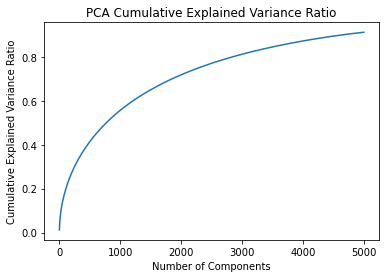

In [51]:
# Plot the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance_ratio)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("PCA Cumulative Explained Variance Ratio")
plt.show()

In [52]:
cumulative_variance_ratio[-1]

0.912305678144021

In [ ]:
len(tfidf_matrix_pca)

In [ ]:
len(tfidf_matrix_pca[0])

In [ ]:
tfidf_l = tfidf_matrix.tolist()
print(len(tfidf_l))
print(len(tfidf_l[0]))

In [ ]:
tfidf_pca_l = tfidf_matrix_pca.tolist()



In [ ]:
print(len(tfidf_pca_l))

In [ ]:
print(len(tfidf_pca_l[0]))

In [39]:
# Create new DataFrames with desired columns
new_columns = ['id', 'url', 'tfidf']
new_columns_pca = ['id', 'url', 'tfidf_pca']

df_new = pd.DataFrame(columns=new_columns)
df_pca = pd.DataFrame(columns=new_columns_pca)



# Populate the new DataFrames
df_new['id'] = df['id']
df_new['url'] = df['url']
df_new['tfidf'] = tfidf_l


df_pca['id'] = df['id']
df_pca['url'] = df['url']
df_pca['tfidf_pca'] = tfidf_pca_l

In [40]:
df_new.head()

,id,url,tfidf
0,UCMdRkWIe9mdpsw4-8EID4rw,https://www.youtube.com/channel/UCMdRkWIe9mdps...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,UCUsTSbCLD96-pcWi2Kqaitg,https://www.youtube.com/channel/UCUsTSbCLD96-p...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,UCyCyTe_1bT2aIPwG_gxbyeg,https://www.youtube.com/channel/UCyCyTe_1bT2aI...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,UCHuD3bhRhvOuAPqVJZlQfWw,https://www.youtube.com/channel/UCHuD3bhRhvOuA...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,UCW2OUlFrrWiZvSsZRwOYmNg,https://www.youtube.com/channel/UCW2OUlFrrWiZv...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [41]:
df_pca.head()

,id,url,tfidf_pca
0,UCMdRkWIe9mdpsw4-8EID4rw,https://www.youtube.com/channel/UCMdRkWIe9mdps...,"[-0.016588829672731484, 0.015252142325332339, ..."
1,UCUsTSbCLD96-pcWi2Kqaitg,https://www.youtube.com/channel/UCUsTSbCLD96-p...,"[-0.02196256804777492, -0.021240739063895266, ..."
2,UCyCyTe_1bT2aIPwG_gxbyeg,https://www.youtube.com/channel/UCyCyTe_1bT2aI...,"[-0.06485105543004062, 0.03584288720878004, 0...."
3,UCHuD3bhRhvOuAPqVJZlQfWw,https://www.youtube.com/channel/UCHuD3bhRhvOuA...,"[-0.03346981069940374, 0.06595214809740794, -0..."
4,UCW2OUlFrrWiZvSsZRwOYmNg,https://www.youtube.com/channel/UCW2OUlFrrWiZv...,"[-0.023003607494280896, -0.06209256603007186, ..."


In [42]:
path_1 = os.path.join(current_dir, "..","data/tfidf_features.csv")

In [43]:
path_2 = os.path.join(current_dir, "..","data/tfidf_pca_features.csv")

In [44]:
df_new.to_csv(path_1, index=False)

In [45]:
df_pca.to_csv(path_2, index=False)